<a href="https://colab.research.google.com/github/Gopal-star2005/Movie-Recommendation-Insights-System/blob/main/Movie_Recommendation_%26_Insights_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("movie_metadata.csv")
print(df.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


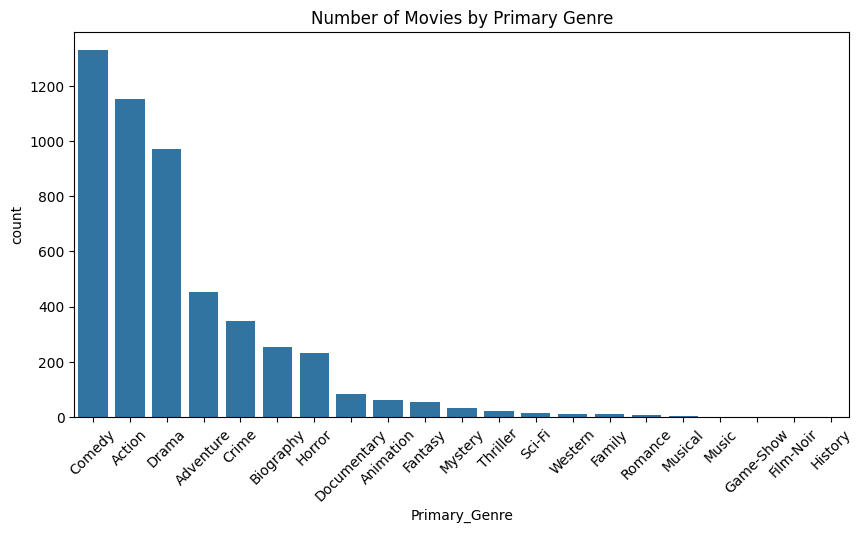

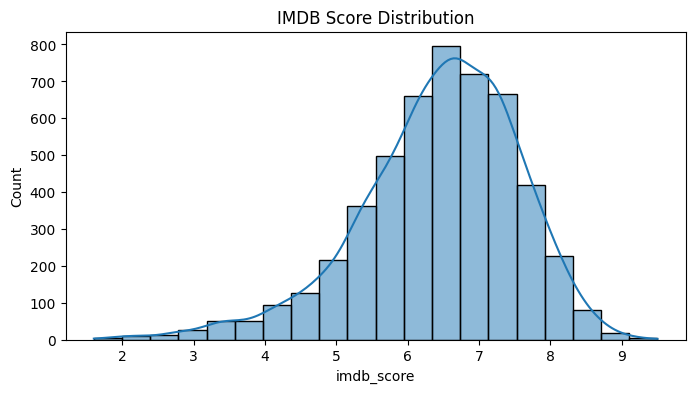

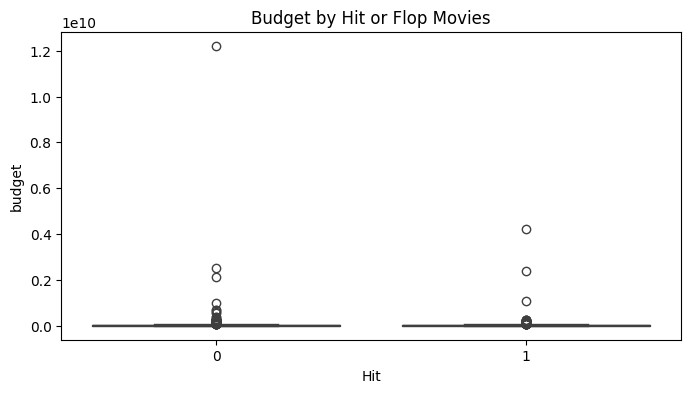

Statistical Summary:
             budget   imdb_score
count  5.043000e+03  5043.000000
mean   3.587432e+07     6.442138
std    1.961555e+08     1.125116
min    0.000000e+00     1.600000
25%    3.000000e+06     5.800000
50%    1.500000e+07     6.600000
75%    4.000000e+07     7.200000
max    1.221550e+10     9.500000

Correlation Matrix:
                 budget  imdb_score  Genre_encoded       Hit
budget         1.000000    0.025768      -0.078435  0.008056
imdb_score     0.025768    1.000000      -0.007021  0.565973
Genre_encoded -0.078435   -0.007021       1.000000  0.008511
Hit            0.008056    0.565973       0.008511  1.000000

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1069
           1       1.00      0.71      0.83       192

    accuracy                           0.96      1261
   macro avg       0.98      0.85      0.90      1261
weighted avg       0.96      0.96      0

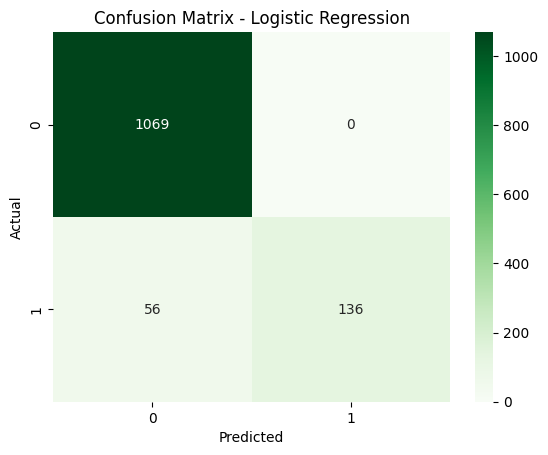

Linear Regression Metrics:
Mean Squared Error: 0.12918229338663342
R-squared: -0.0008159764881847664


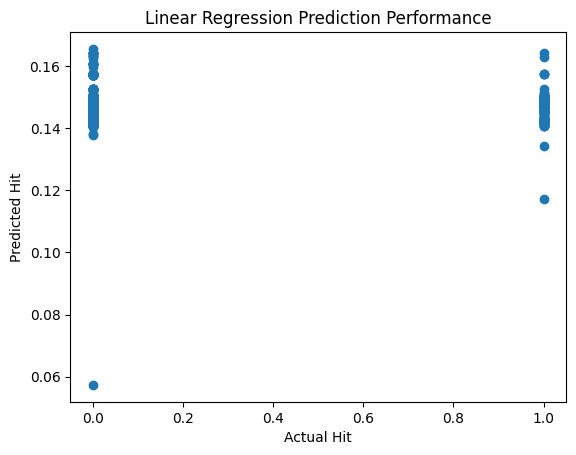

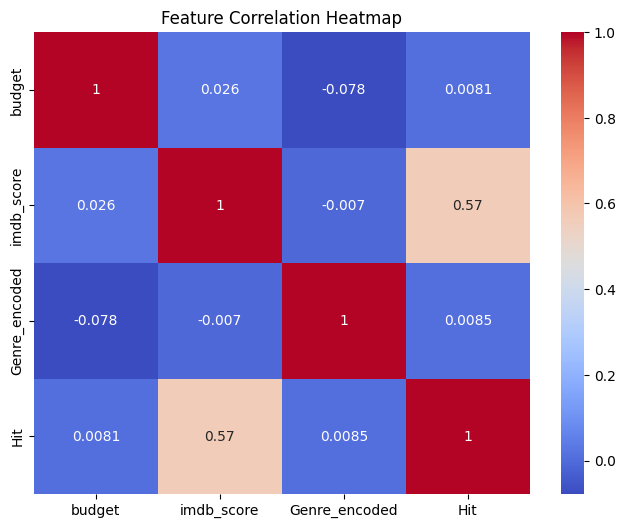

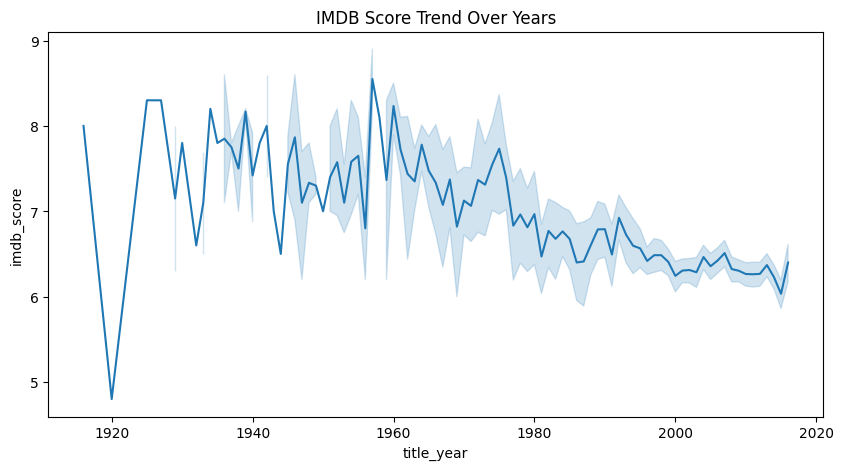

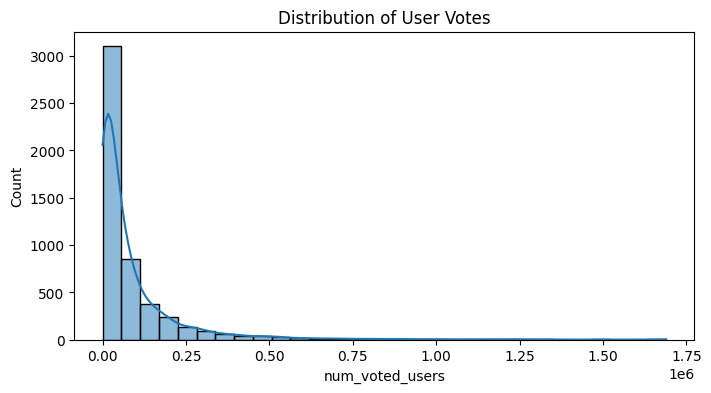

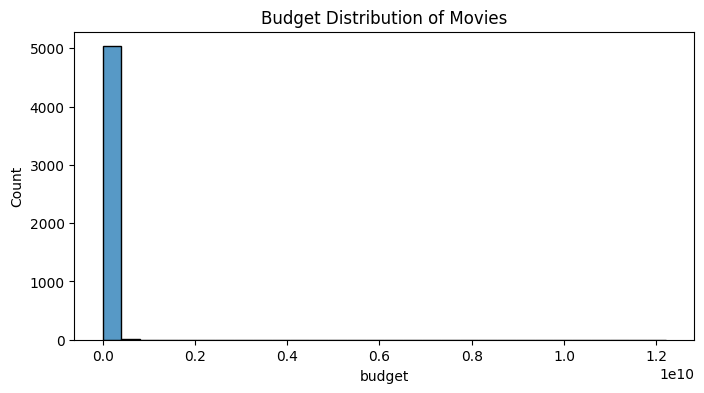

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score

# 1. Data Loading & Cleaning
# Upload movie_metadata.csv to Colab and set path below
file_path = 'movie_metadata.csv'  # Ensure the file is in the Colab environment

# Load dataset
df = pd.read_csv(file_path)

# Handle missing values for important columns
df.fillna({'budget': 0, 'imdb_score': df['imdb_score'].median(), 'genres': 'Unknown'}, inplace=True)
df.dropna(subset=['movie_title', 'genres', 'budget', 'imdb_score'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Define Hit as imdb_score > 7.5 (can be customized)
df['Hit'] = df['imdb_score'].apply(lambda x: 1 if x > 7.5 else 0)

# 2. Feature Engineering
# Extract primary genre and encode it
df['Primary_Genre'] = df['genres'].apply(lambda x: x.split('|')[0])
le = LabelEncoder()
df['Genre_encoded'] = le.fit_transform(df['Primary_Genre'])

# Normalize numeric features
scaler = MinMaxScaler()
df[['budget_norm', 'imdb_score_norm']] = scaler.fit_transform(df[['budget', 'imdb_score']])

# 3. Exploratory Data Analysis (EDA)
# Movies count by primary genre
plt.figure(figsize=(10,5))
sns.countplot(x='Primary_Genre', data=df, order=df['Primary_Genre'].value_counts().index)
plt.title('Number of Movies by Primary Genre')
plt.xticks(rotation=45)
plt.show()

# IMDB scores distribution
plt.figure(figsize=(8,4))
sns.histplot(df['imdb_score'], bins=20, kde=True)
plt.title('IMDB Score Distribution')
plt.show()

# Budget distribution by Hit vs Flop
plt.figure(figsize=(8,4))
sns.boxplot(x='Hit', y='budget', data=df)
plt.title('Budget by Hit or Flop Movies')
plt.show()

# 4. Statistical Summary
print("Statistical Summary:")
print(df[['budget', 'imdb_score']].describe())
print("\nCorrelation Matrix:")
print(df[['budget', 'imdb_score', 'Genre_encoded', 'Hit']].corr())

# 5. Logistic Regression to predict Hit (classification)
features = ['Genre_encoded', 'budget_norm', 'imdb_score_norm']
X = df[features]
y = df['Hit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. Linear Regression to predict Hit as numeric (for example)
linreg = LinearRegression()
linreg.fit(X_train[['Genre_encoded', 'budget_norm']], y_train)
lin_pred = linreg.predict(X_test[['Genre_encoded', 'budget_norm']])

print("Linear Regression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, lin_pred))
print("R-squared:", r2_score(y_test, lin_pred))

# Predicted vs Actual Plot
plt.scatter(y_test, lin_pred)
plt.xlabel('Actual Hit')
plt.ylabel('Predicted Hit')
plt.title('Linear Regression Prediction Performance')
plt.show()

# 7. Additional Visualizations
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['budget', 'imdb_score', 'Genre_encoded', 'Hit']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# IMDB Score Trend Over Years
plt.figure(figsize=(10,5))
sns.lineplot(x='title_year', y='imdb_score', data=df)
plt.title('IMDB Score Trend Over Years')
plt.show()

# User votes distribution
plt.figure(figsize=(8,4))
sns.histplot(df['num_voted_users'], bins=30, kde=True)
plt.title('Distribution of User Votes')
plt.show()

# Budget distribution
plt.figure(figsize=(8,4))
sns.histplot(df['budget'], bins=30)
plt.title('Budget Distribution of Movies')
plt.show()